In [7]:
import pandas as pd

data = pd.read_csv(r'C:\Users\satvi\Downloads\ev_charging_patterns.csv')

print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [8]:
import numpy as np

data['Charging Start Time'] = pd.to_datetime(data['Charging Start Time'])
data['Charging End Time'] = pd.to_datetime(data['Charging End Time'])

data['Energy Consumed (kWh)'] = data['Energy Consumed (kWh)'].fillna(
    data['Charging Rate (kW)'] * data['Charging Duration (hours)']
)

data.dropna(subset=['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)'], inplace=True)

data['Charging Start Hour'] = data['Charging Start Time'].dt.hour

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features = [
    'Battery Capacity (kWh)', 'Energy Consumed (kWh)', 'Charging Duration (hours)',
    'Charging Rate (kW)', 'Charging Cost (USD)', 'State of Charge (Start %)',
    'State of Charge (End %)', 'Distance Driven (since last charge) (km)', 'Temperature (°C)'
]
data[numerical_features] = scaler.fit_transform(data[numerical_features])

data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1189 entries, 0 to 1319
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   User ID                                   1189 non-null   object        
 1   Vehicle Model                             1189 non-null   object        
 2   Battery Capacity (kWh)                    1189 non-null   float64       
 3   Charging Station ID                       1189 non-null   object        
 4   Charging Station Location                 1189 non-null   object        
 5   Charging Start Time                       1189 non-null   datetime64[ns]
 6   Charging End Time                         1189 non-null   datetime64[ns]
 7   Energy Consumed (kWh)                     1189 non-null   float64       
 8   Charging Duration (hours)                 1189 non-null   float64       
 9   Charging Rate (kW)                 

(  User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
 0  User_1        BMW i3                0.558460         Station_391   
 1  User_2  Hyundai Kona                0.514259         Station_428   
 2  User_3    Chevy Bolt                0.383688         Station_181   
 3  User_4  Hyundai Kona                0.253117         Station_327   
 4  User_5  Hyundai Kona                0.253117         Station_108   
 
   Charging Station Location Charging Start Time   Charging End Time  \
 0                   Houston 2024-01-01 00:00:00 2024-01-01 00:39:00   
 1             San Francisco 2024-01-01 01:00:00 2024-01-01 03:01:00   
 2             San Francisco 2024-01-01 02:00:00 2024-01-01 04:48:00   
 3                   Houston 2024-01-01 03:00:00 2024-01-01 06:42:00   
 4               Los Angeles 2024-01-01 04:00:00 2024-01-01 05:46:00   
 
    Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  ...  \
 0               0.369504                   0.06579

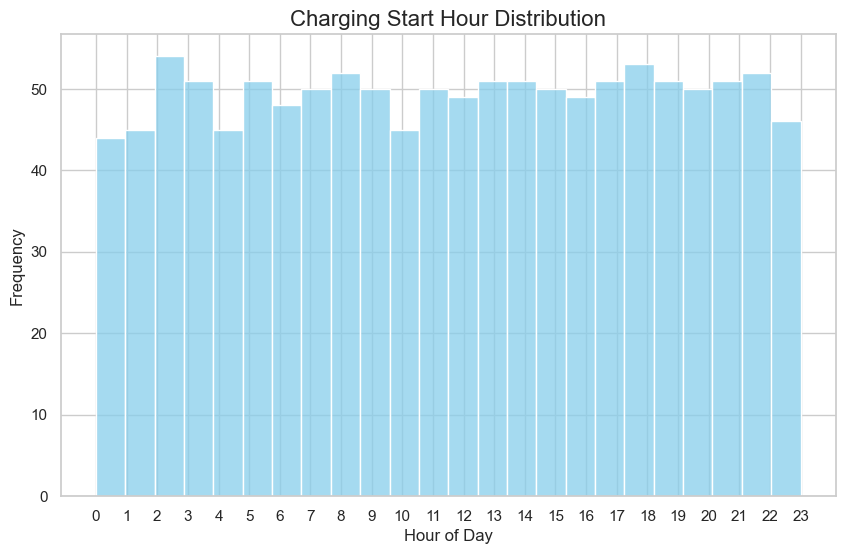

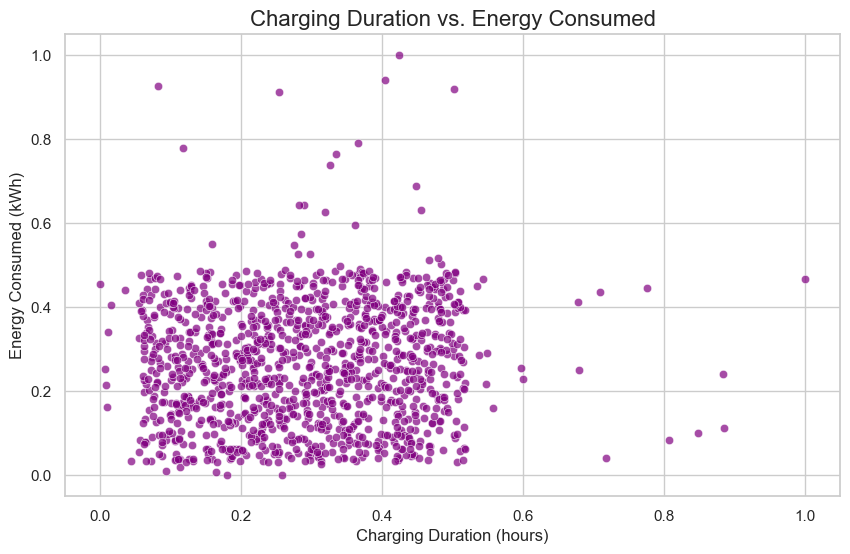

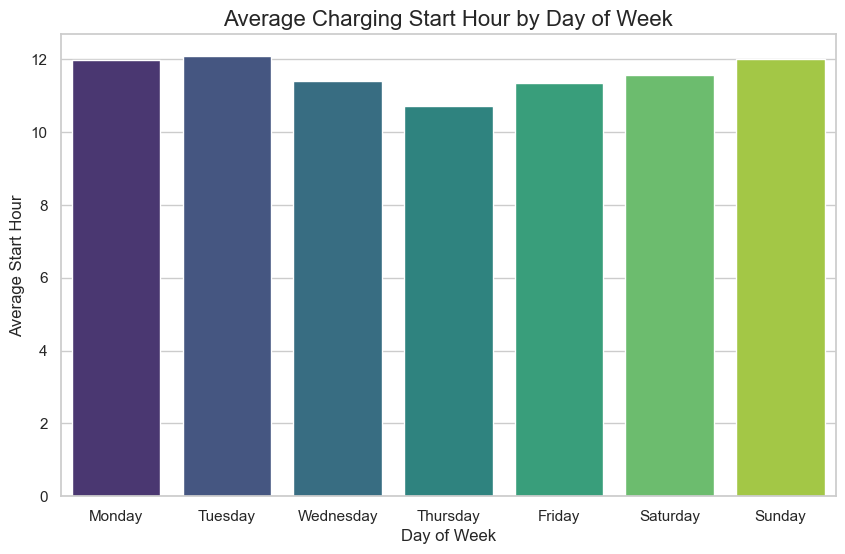

In [9]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

#Charging start hour duration
plt.figure(figsize=(10, 6))
sns.histplot(data['Charging Start Hour'], bins=24, kde=False, color="skyblue")
plt.title("Charging Start Hour Distribution", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(range(0, 24))
plt.show()

# Charging Duration vs Energy Consumed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Charging Duration (hours)', y='Energy Consumed (kWh)', data=data, alpha=0.7, color="purple")
plt.title("Charging Duration vs. Energy Consumed", fontsize=16)
plt.xlabel("Charging Duration (hours)", fontsize=12)
plt.ylabel("Energy Consumed (kWh)", fontsize=12)
plt.show()

# Average charging start hour by day of the week
plt.figure(figsize=(10, 6))
avg_start_hour = data.groupby("Day of Week")["Charging Start Hour"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
sns.barplot(x=avg_start_hour.index, y=avg_start_hour.values, palette="viridis", hue=avg_start_hour.index)
plt.title("Average Charging Start Hour by Day of Week", fontsize=16)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Average Start Hour", fontsize=12)
plt.show()


In [5]:
# Check correlation of numerical features with the target variable
encoded_target = LabelEncoder().fit_transform(data["Charger Type"])
numerical_features = [
    "Energy Consumed (kWh)",
    "Charging Duration (hours)",
    "Charging Rate (kW)",
    "Battery Capacity (kWh)",
    "Vehicle Age (years)",
    "State of Charge (Start %)",
    "State of Charge (End %)",
    "Distance Driven (since last charge) (km)",
    "Temperature (°C)",
]
correlations = pd.DataFrame({
    "Feature": numerical_features,
    "Correlation": [data[feature].corr(pd.Series(encoded_target)) for feature in numerical_features]
})

# Sort by correlation strength
correlations = correlations.sort_values(by="Correlation", ascending=False)
correlations


,Feature,Correlation
0,Energy Consumed (kWh),0.053182
1,Charging Duration (hours),0.042792
3,Battery Capacity (kWh),0.019228
5,State of Charge (Start %),0.013645
4,Vehicle Age (years),0.009026
2,Charging Rate (kW),0.005341
6,State of Charge (End %),-0.004689
8,Temperature (°C),-0.032345
7,Distance Driven (since last charge) (km),-0.033940


Accuracy: 0.31512605042016806
Classification Report:
                  precision    recall  f1-score   support

DC Fast Charger       0.29      0.44      0.35        77
        Level 1       0.35      0.27      0.31        74
        Level 2       0.33      0.24      0.28        87

       accuracy                           0.32       238
      macro avg       0.32      0.32      0.31       238
   weighted avg       0.32      0.32      0.31       238

Random Forest Accuracy: 0.3403361344537815
Random Forest Classification Report:
                  precision    recall  f1-score   support

DC Fast Charger       0.31      0.38      0.34        77
        Level 1       0.32      0.39      0.35        74
        Level 2       0.43      0.26      0.33        87

       accuracy                           0.34       238
      macro avg       0.35      0.34      0.34       238
   weighted avg       0.36      0.34      0.34       238

XGBoost Accuracy: 0.33613445378151263
XGBoost Classification 